In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tokenize.casual import casual_tokenize

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('Data/reddit_corpus', index_col = 0)

In [5]:
df.fillna("", inplace = True)

In [6]:
list_1 = ['ring', 'chosen one', 'gandalf','Gandalf', 'Gandalf the Grey', 'albus', 'albus dumbledore', 'Albus Dumbledore',
 'Sauron the Deceiver', 'sauron', 'Voldemort', 'voldemort ', 'Lord Voldemort', 'the dark lord','The Dark Lord', 'horcrux', 'horcruxes', 
 'Horcrux', 'Horcruxes', 'Nazgul', 'nazgul', 'Dementors', 'dementors', 'gollum', 'Gollum', 'The Elves Shelob', 'Elves',
 'Elf', 'aragog', 'Aragog', 'Mirror of Galadriael', 'Mirror of Erised-Pensieve', 'Dead Marshes', 'Inferi', 'Legilimens',
 'the power of the ring', 'Harry', 'Harry Potter', 'Dobby', 'the elf', 'Wizard', 'wizard', 'wand', 'Hermione', 'Ron']




Replacing any words in list_1 with an empty space.

In [7]:
df['selftext'] = df['selftext'].replace(list_1, "")

In [8]:
X = df['selftext']
y = df['subreddit']

Obtaining baseline value.

In [9]:
y.value_counts(normalize = True)

lotr           0.5
harrypotter    0.5
Name: subreddit, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

In [11]:
vect = CountVectorizer()

In [12]:
vect.fit(X_train)
X_train = vect.transform(X_train)

In [13]:
vect.get_feature_names_out()

array(['000', '03', '10', ..., 'zombified', 'zone', 'zoom'], dtype=object)

In [14]:
vect2 = CountVectorizer()
vect2.fit(X_test)
X_test = vect2.transform(X_test)

In [15]:
pipe = Pipeline([
    ('vect2', CountVectorizer(stop_words = list_1)),
    ('model', LogisticRegression())
])

In [16]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=vect.get_feature_names_out())

Plotting top 10 words.

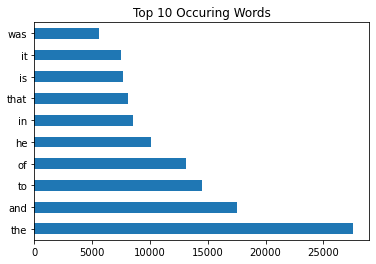

In [18]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Occuring Words');


Below is where we tried to get the results from our pipe, and where there is an error pertaining to the model not being fit correctly. I worked on this with Tanveer, and we could not find the solution. The best hypothesis we both had to this, was that my problem statement had proven true.

In [1]:
#How will my model perform on unseen data?
# cross_val_score(pipe, X_train, y_train, cv=3).mean() 

In [ ]:
#From lecture on 2.25
# param_grid = {
#     'vect__binary': [True, False],
#     'vect__max_features': [None, 4000, 5000],
#     'vect__stop_words': ['english', None],
# }
# gs = GridSearchCV(pipe, param_grid=param_grid)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_